# Expansión Multipolar

## Problema:

Considere un paralelepípedo de lados $a$, $b$ y $c$ centrado con relación al origen del sistema de coordenadas. Si el paralelepípedo está cargado con una densidad volumétrica de carga dada por:
$$\rho(x,y,z) = \frac{Q}{abc},$$
donde $x \in [-a/2,a/2]$, $y \in [-b/2,b/2]$ y $z \in[-c/2,c/2]$. Determine el campo eléctrico mediante la expansión multipolar truncando la serie hasta un cierto valor de $n_{\text{max}}$.

In [1]:
# Escrito por Nataly Ibarra en noviembre de 2020
# Ante cualquier duda o comentario contactar
# a natalynicole.ibarravera@gmail.com
from multipolar_expansion import *

# Lectura del n-ésimo campo (Potencial y Campo Eléctrico)

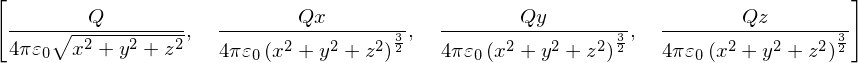

In [2]:
n = 0
campos_n = read_campos_n(n)
campos_n
#V = campos_n[0]
#Ex = campos_n[1]
#Ey = campos_n[2]
#Ez = campos_n[3]

# Lectura del campo hasta un $n_{max}$ (Potencial y Campo Eléctrico)

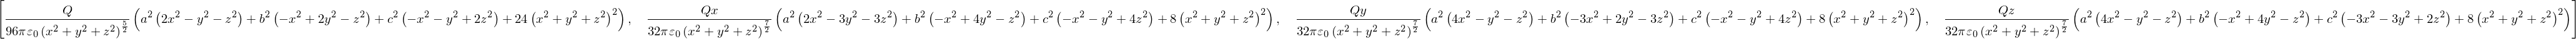

In [3]:
nmax = 2
campos_nmax = read_campos_nmax(nmax)
campos_nmax
#V = campos_nmax[0]
#Ex = campos_nmax[1]
#Ey = campos_nmax[2]
#Ez = campos_nmax[3]

# Gráficos y animaciones

In [4]:
#%matplotlib inline
from sympy.utilities.lambdify import lambdify
import numpy as np
from matplotlib.transforms import Bbox
import matplotlib.pyplot as plt
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.rcParams["font.family"] = "Times New Roman"
#Se cargan funciones para la interactividad
from ipywidgets import interactive
from IPython.display import display

In [5]:
eeps0 = 8.85e-12 # C^2/Nm^2

In [6]:
X = np.linspace(-6,6)
Y = np.linspace(-6,6)
XX, YY = np.meshgrid(X,Y)

In [7]:
cmap = plt.get_cmap('viridis')
def no_interactive(aa=6, bb=2, cc=1, QQ=1, nnmax=0):
    #Se cargan las expresiones simbólicas
    x, y, z, rho, a, b, c, Q = sp.symbols('x, y, z, rho, a, b, c, Q', real=True)
    datos = [(a,aa), (b,bb), (c,cc), (Q,QQ), (sp.pi,np.pi), (eps0,eeps0)]
    campos_nmax = read_campos_nmax(nnmax)
#Se evalúan las expresiones simbólicas de los campos para los distintos datos
    V = campos_nmax[0].subs(datos)
    Ex = campos_nmax[1].subs(datos)
    Ey = campos_nmax[2].subs(datos)
    Ez = campos_nmax[3].subs(datos)
#Se vectorizan los campos
    VVv = np.vectorize(lambdify((x,y,z), V))
    EExv = np.vectorize(lambdify((x,y,z), Ex))
    EEyv = np.vectorize(lambdify((x,y,z), Ey))
    EEzv = np.vectorize(lambdify((x,y,z), Ez))
#Se evalúan los campos en las grillas
    VVV = VVv(XX,YY,0) # Potencial Eléctrico
    EEE = [EExv(XX,YY,0), EEyv(XX,YY,0), EEzv(XX,YY,0)] #Campo Eléctrico
    Emag = np.sqrt(EEE[0]**2 + EEE[1]**2) #Magnitud del Campo Eléctrico
#Se define la máscara donde se evaluará el campo eléctrico 
    XXX = XX[((abs(XX)>aa/2.)+(abs(YY)>bb/2.))]
    YYY = YY[((abs(XX)>aa/2.)+(abs(YY)>bb/2.))]
    Fx = EEE[0]/Emag
    Fy = EEE[1]/Emag
    FFx = Fx[((abs(XX)>aa/2.)+(abs(YY)>bb/2.))]
    FFy = Fy[((abs(XX)>aa/2.)+(abs(YY)>bb/2.))]
#Se construye el gráfico
    fig, ax = plt.subplots(figsize=(8*(480/270.),8))
    plt.pcolormesh(XX, YY, np.log(Emag), shading='gouraud',vmin=20, vmax=45,cmap=cmap)
    clb = plt.colorbar()
    clb.set_label(u'$||\\vec{E}||$ (Escala logarítmica)', labelpad=20, y=0.5, rotation=270,fontsize=18)
    plt.quiver(XXX, YYY, FFx, FFy,angles='xy', scale_units='xy', scale=2)
#Se define el rectángulo que representa el paralelepípedo
    left, bottom, width, height = (-aa/2, -bb/2, aa, bb)
    rect = plt.Rectangle((left, bottom), width, height,facecolor="black", alpha=1)
    ax.add_patch(rect)
#    plt.xlim(-10,10)
#    plt.ylim(-10,10)
    plt.title(u'Expansión Multipolar, $n_{\\rm{max}}=%d$'%nnmax,fontsize=20)
    plt.xlabel('$x$ (m)',fontsize=20)
    plt.ylabel('$y$ (m)',fontsize=20)
    return fig

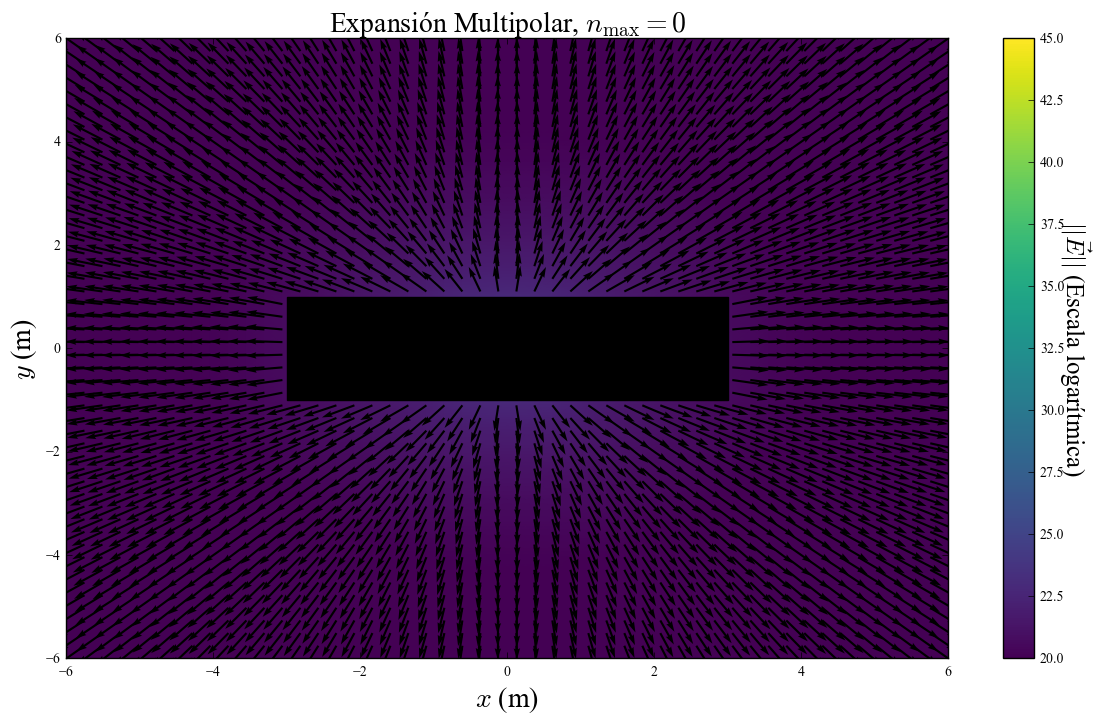

In [8]:
display(interactive(no_interactive,
                    aa = (1,10,1), bb = (1,10,1), cc = (1,10,1),
                    QQ = (-10,10,1), nnmax = (0,10,1)))

In [9]:
for n in range(11):
    fig = no_interactive(aa=6, bb=2, cc=1, QQ=1, nnmax=n)
    fig.savefig('./graficos/multipolar_expansion_nmax_{0:0>2}'.format(n), dpi=100)

In [10]:
!ffmpeg -framerate 1 -pattern_type glob -i graficos/multipolar_expansion_nmax_'*.png' MultipolarExpansion_nmax.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib